In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("customer_churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1092,8590-YFFQO,Male,0,Yes,No,70,Yes,No,DSL,Yes,...,Yes,Yes,No,No,Two year,No,Credit card (automatic),64.95,4523.25,No
4768,3996-ZNWYK,Male,1,Yes,Yes,71,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.80,1388.45,No
5961,2049-BAFNW,Female,0,No,No,1,No,No phone service,DSL,No,...,Yes,Yes,No,No,Month-to-month,No,Mailed check,35.90,35.9,No
6382,8608-OZTLB,Male,0,Yes,Yes,38,Yes,No,DSL,Yes,...,Yes,Yes,Yes,No,One year,No,Electronic check,74.05,2802.3,No
2857,7771-CFQRQ,Female,0,Yes,Yes,47,Yes,No,DSL,No,...,No,Yes,No,Yes,Two year,No,Bank transfer (automatic),63.80,3007.25,No


In [3]:
df.shape

(7043, 21)

In [10]:
df.isnull().sum().sum()

0

In [11]:
df.drop('customerID',axis='columns',inplace=True)

In [12]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [13]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [16]:
# pd.to_numeric(df.TotalCharges)

In [17]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [20]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [21]:
df.iloc[488].TotalCharges

' '

In [22]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [24]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

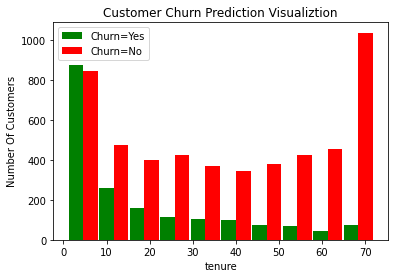

In [27]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

# blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
# blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

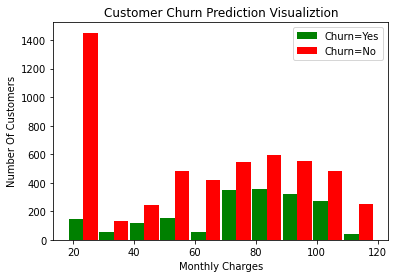

In [28]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges      
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

# blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
# blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [32]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column}: {df[column].unique()}') 

In [33]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [35]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

In [36]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [38]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

In [39]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [40]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

In [41]:
print_unique_col_values(df1)

InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [43]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,1,0,1,1,72,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,1,0,1,1,11,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,0,1,1,0,4,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [44]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [47]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [48]:
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6888,1,0,1,1,0.028169,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
1085,1,1,0,0,0.169014,1,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0
5002,1,0,1,1,0.957746,0,0,1,0,1,...,1,0,0,0,0,1,0,1,0,0


In [49]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [106]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=41)

In [107]:
x_train.shape

(5274, 26)

In [108]:
x_test.shape

(1758, 26)

In [109]:
y_train.shape

(5274,)

In [110]:
import tensorflow as tf
from tensorflow import keras

In [119]:
model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu', kernel_initializer='he_uniform'),
    keras.layers.Dense(20, activation='relu', kernel_initializer='he_uniform'),
    keras.layers.Dense(1, activation='sigmoid', kernel_initializer='glorot_uniform')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train,y_train, epochs=100)

Epoch 1/100
165/165 [==============================] - 1s 3ms/step - loss: 0.5818 - accuracy: 0.6733
Epoch 2/100
165/165 [==============================] - 0s 3ms/step - loss: 0.4390 - accuracy: 0.7850
Epoch 3/100
165/165 [==============================] - 0s 3ms/step - loss: 0.4251 - accuracy: 0.7973
Epoch 4/100
165/165 [==============================] - 0s 2ms/step - loss: 0.4197 - accuracy: 0.7981
Epoch 5/100
165/165 [==============================] - 0s 3ms/step - loss: 0.4159 - accuracy: 0.8022
Epoch 6/100
165/165 [==============================] - 0s 3ms/step - loss: 0.4130 - accuracy: 0.8047
Epoch 7/100
165/165 [==============================] - 0s 3ms/step - loss: 0.4122 - accuracy: 0.8020
Epoch 8/100
165/165 [==============================] - 0s 3ms/step - loss: 0.4095 - accuracy: 0.8057
Epoch 9/100
165/165 [==============================] - 0s 3ms/step - loss: 0.4095 - accuracy: 0.8053
Epoch 10/100
165/165 [==============================] - 0s 3ms/step - loss: 0.4082 - accura

In [120]:
model.evaluate(x_test,y_test)

55/55 [==============================] - 0s 2ms/step - loss: 0.4912 - accuracy: 0.7821


[0.49121540784835815, 0.7821387648582458]

In [121]:
yp = model.predict(x_test)
yp[:5]

array([[7.7712721e-01],
       [4.0796207e-04],
       [2.5071489e-02],
       [8.4581360e-02],
       [8.6343038e-01]], dtype=float32)

In [122]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [123]:
y_pred[:10]

[1, 0, 0, 0, 1, 0, 1, 0, 0, 0]

In [124]:
y_test[:10]

3254    0
116     0
1925    0
15      0
261     1
2537    0
3631    1
4119    0
351     0
1187    0
Name: Churn, dtype: int64

In [125]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1275
           1       0.61      0.56      0.59       483

    accuracy                           0.78      1758
   macro avg       0.73      0.71      0.72      1758
weighted avg       0.78      0.78      0.78      1758



Text(69.0, 0.5, 'Truth')

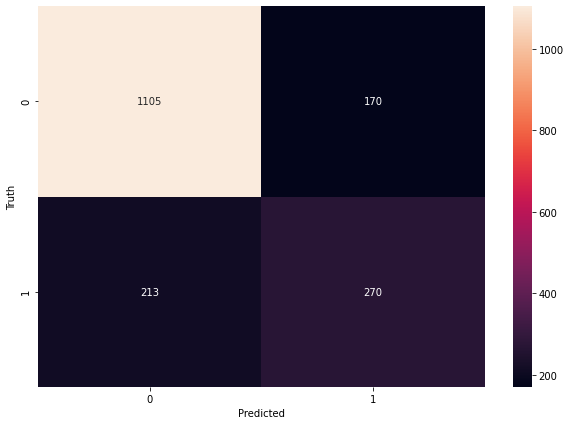

In [126]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [128]:
(1150+270)/(1150+270+213+170)

0.7875762617859123

## Handling imbalanced Dataset - Smote

In [134]:
x = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [135]:
# pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(x,y)

y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [139]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sm,y_sm,test_size=0.25,random_state=41, stratify=y_sm)

In [140]:
model_smote = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu', kernel_initializer='he_uniform'),
    keras.layers.Dense(20, activation='relu', kernel_initializer='he_uniform'),
    keras.layers.Dense(1, activation='sigmoid', kernel_initializer='glorot_uniform')
])

model_smote.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_smote.fit(x_train,y_train, epochs=100)

Epoch 1/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5454 - accuracy: 0.7178
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4799 - accuracy: 0.7713
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4671 - accuracy: 0.7741
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4599 - accuracy: 0.7783
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4530 - accuracy: 0.7842
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4481 - accuracy: 0.7869
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4442 - accuracy: 0.7908
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4404 - accuracy: 0.7898
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4375 - accuracy: 0.7930
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4329 - accura

242/242 [==============================] - 1s 2ms/step - loss: 0.3304 - accuracy: 0.8563
Epoch 82/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3295 - accuracy: 0.8608
Epoch 83/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3292 - accuracy: 0.8581
Epoch 84/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3280 - accuracy: 0.8592
Epoch 85/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3291 - accuracy: 0.8564
Epoch 86/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3279 - accuracy: 0.8603
Epoch 87/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3284 - accuracy: 0.8583
Epoch 88/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3259 - accuracy: 0.8547
Epoch 89/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3254 - accuracy: 0.8594
Epoch 90/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3264 - accuracy: 

In [143]:
model_smote.evaluate(x_test,y_test)

81/81 [==============================] - 0s 2ms/step - loss: 0.4399 - accuracy: 0.8048


[0.43986761569976807, 0.8048024773597717]

In [145]:
yp = model_smote.predict(x_test)
yp[:5]

y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.74      0.79      1291
           1       0.77      0.87      0.82      1291

    accuracy                           0.80      2582
   macro avg       0.81      0.80      0.80      2582
weighted avg       0.81      0.80      0.80      2582



## Handling imbalanced Dataset - Use of ensamble

In [147]:
df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [148]:
x = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [153]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=41, stratify=y)

In [154]:
y_train.value_counts()

0    3872
1    1402
Name: Churn, dtype: int64

In [158]:
3872/2.75

1408.0

In [159]:
df3 = x_train.copy()
df3['Churn'] = y_train

In [161]:
df3_class_0 = df3[df3.Churn == 0]
df3_class_1 = df3[df3.Churn == 1]

In [166]:
df3_class_0[:1402].shape

(1402, 27)

In [168]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)
    
    x_train = df_train.drop('Churn' , axis='columns')
    y_train = df_train.Churn
    
    return x_train,y_train

In [169]:
x_train, y_train = get_train_batch(df3_class_0, df3_class_1, 0, 1402)

x_train.shape

(2804, 26)

In [176]:
model_y1 = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu', kernel_initializer='he_uniform'),
    keras.layers.Dense(20, activation='relu', kernel_initializer='he_uniform'),
    keras.layers.Dense(1, activation='sigmoid', kernel_initializer='glorot_uniform')
])

model_y1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_y1.fit(x_train,y_train, epochs=100)

yp = model_y1.predict(x_test)
yp[:5]

y_pred1 = []
for element in yp:
    if element > 0.5:
        y_pred1.append(1)
    else:
        y_pred1.append(0)

from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred1))

Epoch 1/100
88/88 [==============================] - 0s 3ms/step - loss: 0.6517 - accuracy: 0.6316
Epoch 2/100
88/88 [==============================] - 0s 3ms/step - loss: 0.5469 - accuracy: 0.7193
Epoch 3/100
88/88 [==============================] - 0s 3ms/step - loss: 0.5167 - accuracy: 0.7454
Epoch 4/100
88/88 [==============================] - 0s 2ms/step - loss: 0.5058 - accuracy: 0.7557
Epoch 5/100
88/88 [==============================] - 0s 3ms/step - loss: 0.5002 - accuracy: 0.7532
Epoch 6/100
88/88 [==============================] - 0s 2ms/step - loss: 0.4968 - accuracy: 0.7561
Epoch 7/100
88/88 [==============================] - 0s 2ms/step - loss: 0.4926 - accuracy: 0.7607
Epoch 8/100
88/88 [==============================] - 0s 2ms/step - loss: 0.4908 - accuracy: 0.7628
Epoch 9/100
88/88 [==============================] - 0s 2ms/step - loss: 0.4879 - accuracy: 0.7664
Epoch 10/100
88/88 [==============================] - 0s 2ms/step - loss: 0.4863 - accuracy: 0.7664
Epoch 11/

88/88 [==============================] - 0s 3ms/step - loss: 0.3975 - accuracy: 0.8135
Epoch 84/100
88/88 [==============================] - 0s 3ms/step - loss: 0.3971 - accuracy: 0.8146
Epoch 85/100
88/88 [==============================] - 0s 3ms/step - loss: 0.3969 - accuracy: 0.8135
Epoch 86/100
88/88 [==============================] - 0s 2ms/step - loss: 0.3990 - accuracy: 0.8121
Epoch 87/100
88/88 [==============================] - 0s 3ms/step - loss: 0.3938 - accuracy: 0.8174
Epoch 88/100
88/88 [==============================] - 0s 3ms/step - loss: 0.3947 - accuracy: 0.8117
Epoch 89/100
88/88 [==============================] - 0s 3ms/step - loss: 0.3922 - accuracy: 0.8153
Epoch 90/100
88/88 [==============================] - 0s 2ms/step - loss: 0.3938 - accuracy: 0.8128
Epoch 91/100
88/88 [==============================] - 0s 2ms/step - loss: 0.3907 - accuracy: 0.8213
Epoch 92/100
88/88 [==============================] - 0s 2ms/step - loss: 0.3907 - accuracy: 0.8178
Epoch 93/100


In [177]:
x_train, y_train = get_train_batch(df3_class_0, df3_class_1, 1402, 2804)

model_y2 = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu', kernel_initializer='he_uniform'),
    keras.layers.Dense(20, activation='relu', kernel_initializer='he_uniform'),
    keras.layers.Dense(1, activation='sigmoid', kernel_initializer='glorot_uniform')
])

model_y2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_y2.fit(x_train,y_train, epochs=100)

yp = model_y2.predict(x_test)
yp[:5]

y_pred2 = []
for element in yp:
    if element > 0.5:
        y_pred2.append(1)
    else:
        y_pred2.append(0)

from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred2))

Epoch 1/100
88/88 [==============================] - 1s 3ms/step - loss: 0.6764 - accuracy: 0.5881
Epoch 2/100
88/88 [==============================] - 0s 3ms/step - loss: 0.5456 - accuracy: 0.7325
Epoch 3/100
88/88 [==============================] - 0s 3ms/step - loss: 0.5135 - accuracy: 0.7614
Epoch 4/100
88/88 [==============================] - 0s 3ms/step - loss: 0.5042 - accuracy: 0.7550
Epoch 5/100
88/88 [==============================] - 0s 3ms/step - loss: 0.5005 - accuracy: 0.7568
Epoch 6/100
88/88 [==============================] - 0s 3ms/step - loss: 0.4949 - accuracy: 0.7621
Epoch 7/100
88/88 [==============================] - 0s 2ms/step - loss: 0.4943 - accuracy: 0.7575
Epoch 8/100
88/88 [==============================] - 0s 3ms/step - loss: 0.4901 - accuracy: 0.7628
Epoch 9/100
88/88 [==============================] - 0s 3ms/step - loss: 0.4887 - accuracy: 0.7653
Epoch 10/100
88/88 [==============================] - 0s 3ms/step - loss: 0.4873 - accuracy: 0.7596
Epoch 11/

88/88 [==============================] - 0s 3ms/step - loss: 0.3929 - accuracy: 0.8192
Epoch 84/100
88/88 [==============================] - 0s 3ms/step - loss: 0.3918 - accuracy: 0.8185
Epoch 85/100
88/88 [==============================] - 0s 3ms/step - loss: 0.3918 - accuracy: 0.8238
Epoch 86/100
88/88 [==============================] - 0s 3ms/step - loss: 0.3913 - accuracy: 0.8181
Epoch 87/100
88/88 [==============================] - 0s 3ms/step - loss: 0.3898 - accuracy: 0.8195
Epoch 88/100
88/88 [==============================] - 0s 3ms/step - loss: 0.3870 - accuracy: 0.8263
Epoch 89/100
88/88 [==============================] - 0s 3ms/step - loss: 0.3876 - accuracy: 0.8256
Epoch 90/100
88/88 [==============================] - 0s 3ms/step - loss: 0.3878 - accuracy: 0.8270
Epoch 91/100
88/88 [==============================] - 0s 3ms/step - loss: 0.3856 - accuracy: 0.8270
Epoch 92/100
88/88 [==============================] - 0s 3ms/step - loss: 0.3851 - accuracy: 0.8195
Epoch 93/100


In [178]:
x_train, y_train = get_train_batch(df3_class_0, df3_class_1, 2470, 3872)

model_y3 = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu', kernel_initializer='he_uniform'),
    keras.layers.Dense(20, activation='relu', kernel_initializer='he_uniform'),
    keras.layers.Dense(1, activation='sigmoid', kernel_initializer='glorot_uniform')
])

model_y3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_y3.fit(x_train,y_train, epochs=100)

yp = model_y3.predict(x_test)
yp[:5]

y_pred3 = []
for element in yp:
    if element > 0.5:
        y_pred3.append(1)
    else:
        y_pred3.append(0)

from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred3))

Epoch 1/100
88/88 [==============================] - 0s 3ms/step - loss: 0.6542 - accuracy: 0.6330
Epoch 2/100
88/88 [==============================] - 0s 3ms/step - loss: 0.5367 - accuracy: 0.7461
Epoch 3/100
88/88 [==============================] - 0s 3ms/step - loss: 0.5138 - accuracy: 0.7507
Epoch 4/100
88/88 [==============================] - 0s 3ms/step - loss: 0.5038 - accuracy: 0.7557
Epoch 5/100
88/88 [==============================] - 0s 3ms/step - loss: 0.4969 - accuracy: 0.7564
Epoch 6/100
88/88 [==============================] - 0s 3ms/step - loss: 0.4927 - accuracy: 0.7600
Epoch 7/100
88/88 [==============================] - 0s 3ms/step - loss: 0.4894 - accuracy: 0.7600
Epoch 8/100
88/88 [==============================] - 0s 3ms/step - loss: 0.4849 - accuracy: 0.7643
Epoch 9/100
88/88 [==============================] - 0s 3ms/step - loss: 0.4823 - accuracy: 0.7611
Epoch 10/100
88/88 [==============================] - 0s 2ms/step - loss: 0.4799 - accuracy: 0.7668
Epoch 11/

88/88 [==============================] - 0s 3ms/step - loss: 0.3935 - accuracy: 0.8131
Epoch 84/100
88/88 [==============================] - 0s 3ms/step - loss: 0.3905 - accuracy: 0.8181
Epoch 85/100
88/88 [==============================] - 0s 3ms/step - loss: 0.3892 - accuracy: 0.8199
Epoch 86/100
88/88 [==============================] - 0s 3ms/step - loss: 0.3882 - accuracy: 0.8199
Epoch 87/100
88/88 [==============================] - 0s 3ms/step - loss: 0.3885 - accuracy: 0.8206
Epoch 88/100
88/88 [==============================] - 0s 3ms/step - loss: 0.3868 - accuracy: 0.8206
Epoch 89/100
88/88 [==============================] - 0s 3ms/step - loss: 0.3869 - accuracy: 0.8181
Epoch 90/100
88/88 [==============================] - 0s 3ms/step - loss: 0.3858 - accuracy: 0.8231
Epoch 91/100
88/88 [==============================] - 0s 3ms/step - loss: 0.3854 - accuracy: 0.8210
Epoch 92/100
88/88 [==============================] - 0s 3ms/step - loss: 0.3838 - accuracy: 0.8224
Epoch 93/100


In [181]:
len(y_pred3)

1758

In [182]:
y_pred_final = y_pred1.copy()

for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

## This was pretty bad

In [183]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           0       0.91      0.75      0.82      1291
           1       0.53      0.78      0.64       467

    accuracy                           0.76      1758
   macro avg       0.72      0.77      0.73      1758
weighted avg       0.81      0.76      0.77      1758

